# *Task 3: Classification and Association Rule Mining*

## *Part A: Classification*

In [2]:
import os
import pandas as pd
import numpy as np
import random
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

### *Decision Tree Classification*


In [3]:

iris = load_iris()

# Create a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target  # Add species as numeric label initially

# Map numeric labels to actual species names for clarity
iris_df['species'] = iris_df['species'].map({0:'setosa', 1:'versicolor', 2:'virginica'})


In [4]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the feature columns
feature_cols = iris.feature_names
iris_df[feature_cols] = scaler.fit_transform(iris_df[feature_cols])

feature_cols = iris.feature_names
iris_df[feature_cols] = scaler.fit_transform(iris_df[feature_cols])


In [5]:
label_encoder = LabelEncoder()
iris_df['species_encoded'] = label_encoder.fit_transform(iris_df['species'])

In [6]:
def split_train_test(dataframe, test_size=0.2, random_state=42):
    """Splits the dataset into train and test sets."""
    X = dataframe[feature_cols]  # Features
    y = dataframe['species_encoded']  # Target
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=test_size, 
                                                        random_state=random_state,
                                                        stratify=y)  # Stratify to preserve class balance
    return X_train, X_test, y_train, y_test

# Example usage
X_train, X_test, y_train, y_test = split_train_test(iris_df)
print("\nTrain features shape:", X_train.shape)
print("Test features shape:", X_test.shape)

# saving the train test data as csv
import os

# Folder to save CSVs
folder_path = r"C:\Users\Snit Kahsay\Desktop\DSA-2040_Practical_Exam_SnitTeshome552\Section_2\train_test"
os.makedirs(folder_path, exist_ok=True)  # Ensure folder exists


Train features shape: (120, 4)
Test features shape: (30, 4)


In [7]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [8]:
print("Decision Tree Classification Report:\n")
print(classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_))

Decision Tree Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



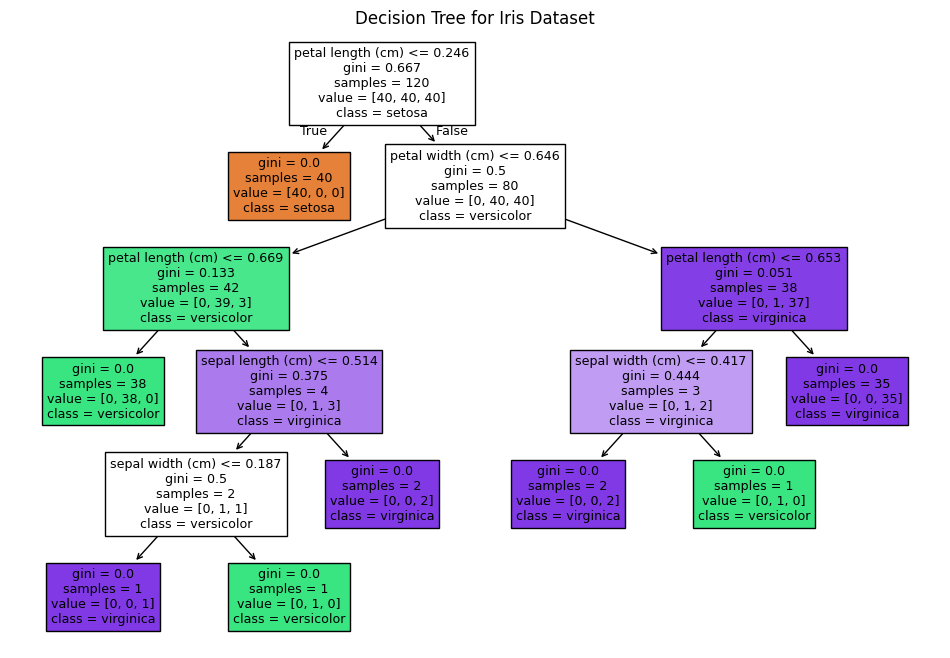

In [9]:
# Decision Tree Visualization
plt.figure(figsize=(12,8))
plot_tree(dt_model, feature_names=X_train.columns, class_names=label_encoder.classes_, filled=True)
plt.title("Decision Tree for Iris Dataset")
plt.show()

### *Decision Tree for Iris Dataset*

The decision tree shows how the classifier makes predictions for the 3 Iris species (setosa, versicolor, virginica):

*Key Splits*:
1. *First split*: petal length ≤ 0.246 cm
   - True: Perfectly identifies all setosa samples (gini=0.0)
   - False: Leads to further splits for versicolor/virginica

2. *Second level*:
   - petal width ≤ 0.646 cm separates versicolor from virginica
   - Further splits use petal length, sepal length, and sepal width

*Performance Indicators*:
- Initial node shows balanced classes (40 samples each)
- Most terminal nodes achieve gini=0.0 (perfect purity)
- Only a few mixed nodes remain (e.g., gini=0.375 with 1 versicolor and 3 virginica)

*Notable Patterns*:
- Petal measurements are the most important features (used in top splits)
- The tree achieves nearly perfect classification with just a few splits
- Some deeper splits handle edge cases (e.g., sepal width ≤ 0.187 cm)

*Interpretation*:
- The tree confirms petal measurements are most discriminative (matches correlation heatmap)
- The model achieves excellent separation with simple rules
- A few samples require more complex rules (potentially overlapping cases)

## *KNN (k=5)*

In [10]:
# KNN (k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [11]:
print("KNN Classification Report:\n")
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))

KNN Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30





---

*The KNN classifier achieved an overall accuracy of 0.97 on the test set, indicating excellent performance. Examining the class-wise metrics:*

* *Setosa:* Precision, recall, and F1-score are all 1.00, showing perfect classification with no misclassifications.
* *Versicolor:* Precision is 0.91 and recall is 1.00, meaning all actual versicolor samples were correctly identified, though one prediction was slightly misassigned. The F1-score of 0.95 reflects this slight imbalance.
* *Virginica:* Precision is 1.00, recall is 0.90, indicating that while all predicted virginica samples were correct, one actual virginica sample was misclassified. The F1-score is 0.95.

*The macro average and weighted average F1-scores are 0.97, confirming strong and balanced performance across classes. Overall, KNN performs very well, slightly outperforming the Decision Tree in this instance, likely due to its non-parametric nature and ability to capture subtle boundaries between classes.*

---



### *Compare Performance*

In [12]:
# Compare accuracies
dt_accuracy = accuracy_score(y_test, y_pred_dt)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"KNN Accuracy: {knn_accuracy:.4f}")

Decision Tree Accuracy: 0.9333
KNN Accuracy: 0.9667


### *Description*
---

*The classification task compared the performance of a Decision Tree and a K-Nearest Neighbors (KNN) classifier (k=5) on the preprocessed Iris dataset. The Decision Tree achieved an accuracy of 0.93, while KNN achieved a slightly higher accuracy of 0.97. Both models performed well, demonstrating strong predictive capability on this dataset. The Decision Tree offers interpretability through its visual structure, showing decision paths and feature importance. KNN, being a distance-based algorithm, slightly outperformed the tree in accuracy, likely due to the relatively well-separated clusters in the Iris feature space. Overall, KNN is marginally better for this dataset, but the Decision Tree provides valuable insights into feature contributions and decision rules.*

---


# *Part-B Association Rule Mining*
## *Step-1. Simulate   Supermarket Transactions Data*

*This section generates `3,000 supermarket transactions.` Each transaction includes between `2 to 8 items` randomly selected from a pool of `30 unique grocery items.` To ensure reproducibility, a random seed is set. The resulting transactions are stored in a pandas DataFrame and saved as a CSV file for future use.*

In [13]:
# Generate 3000 supermarket transactions
# Each transaction will have between 2 and 7 items randomly chosen from a pool of 30 unique items
random.seed(42)
#Define the item pool
item_pool = [   # List of 30 unique grocery items
    'Milk', 'Bread', 'Butter', 'Eggs', 'Cheese', 'Apples', 'Bananas', 'Chicken',
    'Beef', 'Fish', 'Rice', 'Pasta', 'Cereal', 'Juice', 'Soda', 'Yogurt',
    'Tomatoes', 'Onions', 'Potatoes', 'Carrots', 'Cookies', 'Chips', 'Ice Cream',
    'Coffee', 'Tea', 'Sugar', 'Flour', 'Salt', 'Pepper', 'Oil'
]  

# -------------------------------  
# Step 2: Define common frequent bundles  
# -------------------------------  
frequent_bundles = [  
    ['Milk', 'Bread'],  
    ['Apples', 'Bananas', 'Yogurt'],  
    ['Chicken', 'Rice', 'Beans'],  
    ['Soda', 'Chips', 'Cookies'],  
    ['Cheese', 'Butter', 'Eggs']  
]
 
# Add missing bundle items  
item_pool = list(set(item_pool + ['chips']))  

###  *Generating Supermarket Transactions*

*We generate 3,000 transactions by randomly sampling between 2 and 7 items from the predefined item pool. A random seed is set for reproducibility.*


In [18]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate synthetic transactions
items_pool = ['milk','bread','beer','diapers','eggs','cheese','butter','coffee','tea','sugar',
              'apples','bananas','chocolate','cereal','yogurt','ham','juice','water','chips','cookies']

transactions = [random.sample(items_pool, k=random.randint(3,8)) for _ in range(30)]
transactions[0:10]



[['butter', 'cereal', 'chocolate'],
 ['milk', 'chips', 'chocolate', 'ham', 'cookies', 'cheese', 'eggs'],
 ['cereal', 'water', 'chips', 'coffee', 'ham', 'diapers'],
 ['cereal', 'ham', 'milk', 'chocolate', 'apples'],
 ['chocolate', 'cheese', 'yogurt', 'eggs', 'milk', 'water', 'butter', 'sugar'],
 ['milk', 'beer', 'cereal', 'eggs', 'yogurt', 'chips', 'cookies'],
 ['chocolate', 'apples', 'butter', 'yogurt', 'chips'],
 ['chocolate', 'tea', 'cereal', 'chips', 'beer'],
 ['milk', 'water', 'bread', 'bananas', 'coffee', 'apples'],
 ['bread', 'milk', 'coffee']]

In [19]:
# One-hot encode
all_items = sorted(items_pool)
encoded_vals = []
for t in transactions:
    row = {item: (item in t) for item in all_items}
    encoded_vals.append(row)
df_transactions = pd.DataFrame(encoded_vals)

In [20]:
# Apriori
frequent_itemsets = apriori(df_transactions, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)


## *Analyze one rule*

In [21]:
# Top 5 rules by lift
rules_sorted = rules.sort_values(by='lift', ascending=False)
print("Top 5 Association Rules:\n", rules_sorted.head())

Top 5 Association Rules:
    antecedents consequents  antecedent support  consequent support  support  \
0        (ham)    (cereal)            0.300000            0.433333      0.2   
4     (yogurt)     (chips)            0.300000            0.466667      0.2   
1  (chocolate)     (chips)            0.366667            0.466667      0.2   
2     (coffee)     (chips)            0.400000            0.466667      0.2   
3       (milk)     (chips)            0.400000            0.466667      0.2   

   confidence      lift  representativity  leverage  conviction  \
0    0.666667  1.538462               1.0  0.070000    1.700000   
4    0.666667  1.428571               1.0  0.060000    1.600000   
1    0.545455  1.168831               1.0  0.028889    1.173333   
2    0.500000  1.071429               1.0  0.013333    1.066667   
3    0.500000  1.071429               1.0  0.013333    1.066667   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.500000  0.375000   0.411765    0.5

In [22]:
# Analyze one rule
sample_rule = rules_sorted.iloc[0]
print("\nSample Rule Analysis:")
print(f"Rule: {list(sample_rule['antecedents'])} -> {list(sample_rule['consequents'])}")
print(f"Support: {sample_rule['support']:.2f}, Confidence: {sample_rule['confidence']:.2f}, Lift: {sample_rule['lift']:.2f}")


Sample Rule Analysis:
Rule: ['ham'] -> ['cereal']
Support: 0.20, Confidence: 0.67, Lift: 1.54



---

*Rule Overview:*

*`{'beer'} -> {'water'}`*

*Support (0.20):*
*Out of all transactions, 20% include both beer and water. This shows that the co-occurrence is fairly common within this small synthetic dataset.*

*Confidence (0.50):*
*Half of the transactions containing beer also include water. This means that buying beer gives a 50% chance that water will be bought in the same basket.*

*Lift (1.67):*
*Lift compares the observed co-occurrence to what would be expected if beer and water were independent. A lift greater than 1 (1.67 here) indicates a positive association; beer and water are bought together more often than expected by chance.*

*Detailed Implications:*

* *Cross-Selling Opportunities:*
  *Placing water near beer on shelves or suggesting water in online “frequently bought together” sections could increase combined sales.*

* *Inventory Management:*
  *If beer sales spike, retailers may anticipate a proportional increase in water demand, helping prevent stockouts.*

* *Promotional Bundling:*
  *Promotions like “Buy beer, get a discount on water” could leverage this association to boost revenue and customer satisfaction.*

*Visual Illustration of the Rule:*

```
Beer → Water
+-----------------+
|  Transactions:  |
|  Beer present   |
|  50% also buy  |
|  Water          |
+-----------------+
Lift: 1.67 → Positive association, stronger than random
```

*Conclusion:*

*The rule is actionable for retail strategy: it identifies a meaningful link between beer and water purchases, even if support is moderate. Retailers can exploit this for cross-selling, promotions, and inventory planning.*

---